Homework 1 — (15 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [2]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

C:\Users\Magan Omar\Miniconda2\envs\eecs352\lib\site-packages\librosa\core\audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


## Questions

#### 1. (one point) Go out on the web and read about the early history of audio recording. Thomas Edison, Alexandar Graham Bell,  Édouard-Léon Scott de Martinville and Valdemar Poulsen are all big names in the history of audio recording. Give one paragraph on what each of these people contributed to audio recording.

Thomas Edison first invented the phonograph in 1877, which could record sound, and play it right back. The earlierst version of the phonograph recorded on a thin sheet of tinfoil wrapped around a metal cylider. Alexander Graham Bell also was the first to invent the telephone, but also invented the graphaphone, whcih was essentially an improved version of the phonograph. THe graphaphone was easier to handle, could have longer recordings, and had better sound quality. While the phonograph took recordings of sound and later reproduced them, the telephone transmitted sound via electrical signals, (which makes them obviously different. Édouard-Léon Scott de Martinville invented the earliest known sound recording device, the phonautograph, which was patented in 1857. Though later efforts to transform these visual representations were successful (in 2008), no one suspected that the sound to visual effect process could be reversed.  Valdemar Poulsen developed a magnentic wire recorder in 1899 and the first continuous wave radio transmitter in 1903.. Until 1993, someone won an award in his name for doing transforming things with audio.

#### 2. (one point)  The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Explain what effect this difference in sample rate has on the ability of a recorder to reproduce sound and why the sample rate of CD audio is what it is. 

The difference in sample rate is only 8 bits between the telephone audio and CD audio. The more bits you have, the more quantization levels you get. A CD has 65,536 levels, and telephone audio has only 256 levels. And that leads you to more dynamic range. And more dynamic range means better sound. 

#### Sample rate isn't the only difference between CD and telephone audio. Express in dB the difference in dynamic range between 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Show you work.

dynamic range (dB difference) = 20*log10(2^16) - 20*log10(2^8) = 96.33 - 48.16 = 48.17 dB

bits needed to exceed dynamyc range of human hearing:
    dynamic range of human hearing = 120 dB
    120 = 20*log10(2^x)
        => x = 19.93
        => you need over 19.93 bits to exceed dynamic range of human hearing

In [ ]:
# your code to give the answer goes here

#### 3. (one point) Make a function to generate sinewaves and a function  to plot an audio signal. Label the figure's axes appropriately.

In [3]:
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal            
    """

    time = np.arange(0, t*sr)/sr  
    x = np.sin(2*np.pi*f*time)
    return x


    
def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """

    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()
    

#### 4. (one point) What 3 pitch classes are in a C major triad? Make a C major triad out of sine waves that is in the same octave as A440 (i.e. starting on the C above A440). Display the waveform and play it.

The three notes in a C major triad are C-E-G.


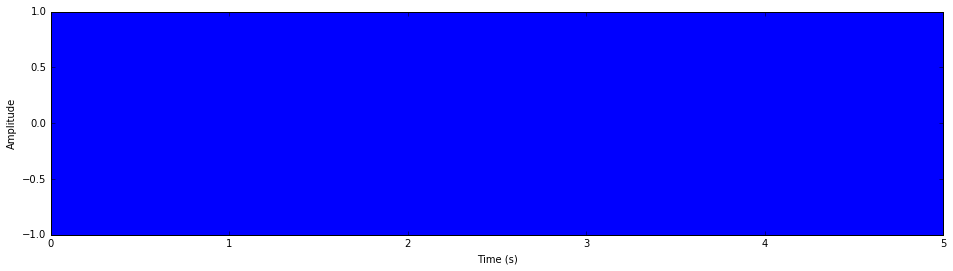

In [4]:
# Make, plot and play the C major triad here.

x = make_sinewave(523.251,5.,44100) # C
y = make_sinewave(659.255,5.,44100) # E
z = make_sinewave(783.991,5.,44100) # G
plot_audio(x,44100) # plotting all three notes

Audio(x+y+z, rate=44100) # playing all three notes


#### 5. (one point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value.

In [4]:
def rms_db(signal, reference):
    
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    size = len(signal)
    squared_array = [x**2 for x in signal]
    mean = np.sum(squared_array) / size # finds the mean of squared array
    sqrt_sum = np.sqrt(mean) # squrare roots mean
    rms = 20*np.log10(sqrt_sum/reference)
    return rms

#### 6. (one point) Make a signal.  Vary its volume and find out for yourself how many dB different sounds have to be, before you can tell the volume is different?  Play identical pairs, where the only difference between them is the amplitude. Start with 0 db difference, and grow the difference until you can reliably tell them apart.   Oh...and do this in a quiet room with headphones on. This won't work at all on your laptop speakers or in a loud room.

I noticed a difference in volume at about 0.7 dB.


In [6]:
#write your code to make repeated pairs of audio that vary by differing dB amounts here.

"""
triad = x+y+z

db = 50
exp = db/20
amp_ratio = 10**exp

triad_new = triad * amp_ratio
Audio(triad_new, rate=44100)
"""
import random
dB_diff = 1.
a = random.randint(1,4)
def amp_diff(dB_diff):
    return 10. ** (dB_diff / 20.)
ad = amp_diff(dB_diff)

loud_sound = make_sinewave(440., float(a), 44100.)
quiet_sound = make_sinewave(440., 3., 44100.)

loud_sound *= ad

together = np.append(loud_sound, quiet_sound)
together = together / np.max(abs(together))
Audio(together, rate=44100.)



#### 7. (one point) Implement a Fourier transform function and an inverse Fourier transform function using the formulae from the course lecture notes.

In [7]:
def fourier_transform(x):
    """ 
    Performs a Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of real or complex values containing the signal
    
    Returns
    -------
    np.ndarray 
        Array of complex vaules containing the signal
        
    """
    size = len(x)
    X = []
    
    for k in xrange(0,size):
        tot = 0
        for n in xrange(0,size):
            tot = tot + x[n]*np.exp((-2.*np.pi*1j*k*n)/size)
        X.append(tot)
    return X
   
    """"
    nterm = np.arange(float (size))
    parte = np.exp((-2.*np.pi*1j*k)/size)
    tot = parte**nterm
    return np.multiply(tot, x)
    """

In [ ]:
def inverse_fourier_transform(X):
    """ 
    Performs an inverse Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of  complex values containing the signal
    
    Return
    ------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    """"
    size = len(X)
    k = 1500
    nterm = np.arange(float (size))
    parte = np.exp((2.*np.pi*1j*k)/size)
    tot = parte**nterm
    
    tot_sum = np.multiply(tot, X)
    tot_sum = tot_sum/size
    """
    N = len(X)
    x = []
    
    for n in xrange(0,N):
        sum = 0
        for k in xrange(0,N):
            sum = sum + X[k]*np.exp(2*np.pi*1j*k*n/N)
        x.append(sum/N)
    
    return np.real(x)

""""       
playing2 = inverse_fourier_transform(asdf[:80])    
#Audio(playing1, rate=44100)    
Audio(playing2, rate=44100)    
plot_audio(playing2,44100)
"""

#### 8. (one point) Write code to test that these functions work properly. Be sure to explain why you think your test is a good one.

This test basically plots the original signal, makes it go through the fourier transform, then the inverse fourier transform. Then I'll plot the total, and both plots should overlap. I think this is sufficient because if they overlap, that means they're the same signal, and don't have any differences (or at least any significant ones). 


NameError: name 'inverse_fourier_transform' is not defined

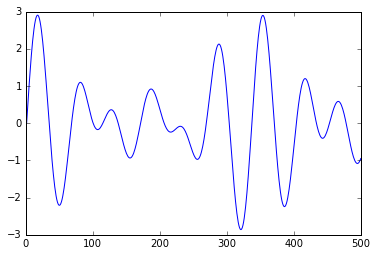

In [8]:
# Write your code to check here. 
# Be sure to explain in your comments how this test confirms the correctness.
# NOTE: 2 things *I* would test are (1) if I take the Fourier transform of a signal, 
# and then take its output as the input to the inverse Fourier transform, does the 
# result look like the original signal?  and (2) If I look at the result of the 
# Fourier transform, do I see a pattern of energy that I would expect to see, given
# what the input signal contains?

n = [i+1 for i in range(500)] # just sampling the first 500 indicies, to make it go faster
triad = x+y+z # triad from signal before

plt.plot(n, triad[:500]) # plotting original signal

ft = fourier_transform(triad[:500]) #putting through fourier transform
ift = inverse_fourier_transform(ft) #putting through inverse fourier transform
plt.plot(n, ift) # plotting final signal
# both signals plot on the same plot, and they should overlap!
# or you could comment one of the plots to see the other byitself, and it should be the same


From this point on, you will use the fft and ifft functions from scipy, as they are much faster than the code you just wrote. See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


Hint: https://docs.python.org/2/library/timeit.html and https://docs.python.org/2/library/time.html  are useful for the following problem.
            

#### 9. (one point) What is the computational complexity of the Fourier Transform  code you built? What is the computational complexity of the Fast Fourier Transform (FFT)? Illustrate the difference in running time by measuring how long it takes your fourier_transform code on signals of different length and plot the time to completion (vertical axis) as a function of the number of samples (horizontal axis). Compare that on the same graph to how long it took on the same number of samples with the python FFT. Do these time numbers back up the computational complexity?

The complexity of the Fourier Transform I wrote is O(n^2), whereas the complexity of the fast fourier transform is O(nlog(n)). And the results below does back up the computational complexity, as the FFT doesn't increase at all (with 100 samples), but the FT that was coded above is incrasing very steadily.

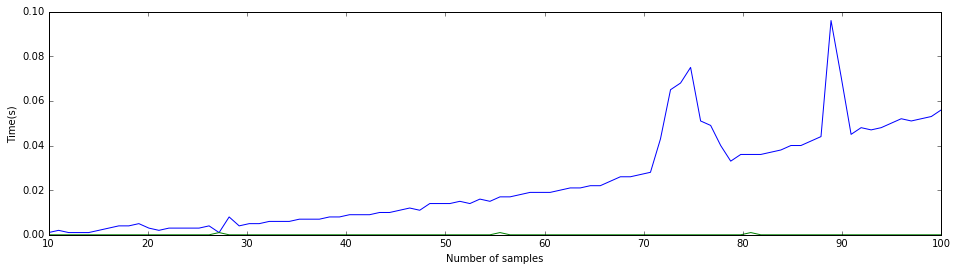

In [9]:
# Write your code to test the timing of the two approaches here.

import time

# testing signal y (E4)

min = 10
max = 100
interv = 1
myfourtim = []
ffttimes=[]

n = [i+1 for i in range(50)]

for n in xrange(min, max, interv):
    start_time1 = time.time()
    fourier_transform(triad[:n])
    myfourtim.append(time.time() - start_time1)
    
    
for n in xrange(min, max, interv):
    start_time2 = time.time()
    sp.fft(triad[:n])
    ffttimes.append(time.time() - start_time2)

t = np.linspace(min, max, (max-min)/interv)

plt.figure(figsize=(16,4))
plt.plot(t, myfourtim)
plt.plot(t, ffttimes)
plt.ylabel('Time(s)')
plt.xlabel('Number of samples')
plt.show()

#### 10. (one point) The choice of windowing function for your FFT is an important one. Make a sound composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now, take a 64-sample window of the signal and take the FFT of it. Plot the log magnitude spectrum of your signal. Then,  apply a Hann window (from scipy.signal) to the audio before taking another FFT and plot that on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly ( horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

#### Which approach do you think gives a more accurate visualization of the signal contents, the "unwindowed " (i.e. rectangular window) spectrum, or the one windowed with the Hann window?  What is the underlying reason it looks more accurate? 

I think the one windowed witht the Hann window gives a mroe accurate visualization of the signal contents, mainly because it looks more consistent on the graph, and doesn't dip significantly in magnitude, unlike the unwindowed spectrum.

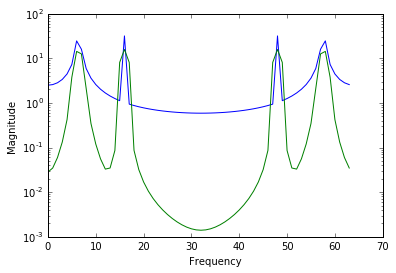

In [10]:
#Write your code for plotting the FFT of the harmonic sound here

signal = make_sinewave(100., 5., 1000.) + make_sinewave(250., 5., 1000.)
sound = signal[:64]
h = sound.copy()
hann = sp.signal.hann(64)

for n in xrange(64):
    h[n] *= hann[n]

h = np.absolute(sp.fft(h))   
fft = np.absolute(sp.fft(sound))
plt.yscale('log')


plt.plot(fft)
plt.plot(h)
plt.ylabel("Magnitude")
plt.xlabel("Frequency")
plt.show() # blue plot is unwindowed; green plot is Hann-windowed


#### 11. (one point)  Now, do everything exactly like you did in question 10....except increase the number of points in your FFT by taking  a 256 point FFT of this 64-point windowed sample (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal. What do you see that you didn't see before? 

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



The answer is very similar as to number 10, and since it has more points this time, it zig-zags up and down more often, which looks more like a sinusoid when zoomed in. Also it seems to be more accurate, as when you look at the crest of the signal, the Hann version looks like it nicely goes over, and does not overlap the unwindowed version, whereas in the previous one, it looks like they did overlap a bit towards the crest of the signal.


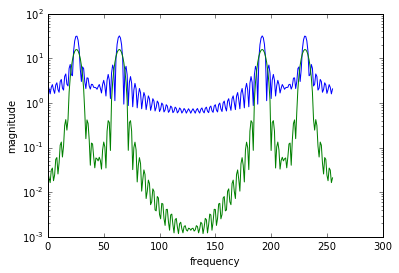

In [11]:
# write the code here

signal = make_sinewave(100., 5., 1000.) + make_sinewave(250., 5., 1000.)

sound = signal[:64]

h = sound.copy()
hann = sp.signal.hann(64)

for n in xrange(64):
    h[n] *= hann[n]

h = np.absolute(sp.fft(h, 256))
    
fft = np.absolute(sp.fft(sound, 256))
plt.yscale('log')
plt.plot(fft)
plt.plot(h)
plt.ylabel("magnitude")
plt.xlabel("frequency")
# plt.hist(fft, bins=np.arange(min(fft), max(fft) + 1, 1))
# plt.hist(horse, bins=np.arange(min(fft), max(fft) + 1, 1))
plt.show()

#### 12. (one point) What is the pitch (in Hz) of the lowest note played by a well-tuned piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequency bins (and therefore the frequency of the lowest component you can represent) is low enough to capture the lowest note on the piano. 

The lowest note on a piano is the note A at 27.5 Hz. The highest note is the note C at 4.1 kHz.
The minimum window length is:
    1/27.5 * 44100 = 1604 samples in the window.

#### 13. (one point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0).  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

It sounded like the pitch change after three harmonics

In [12]:
# your code to make the missing fundamental illustration goes here.

final = []
for i in range(1, 10):
    total = make_sinewave(131., 2., 44100)
    for n in range(10-1,1,-1):
        total = total + make_sinewave(131. * n, 2., 44100)
    final.append(total)

Audio(final, rate=44100)

#### 14. (one point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Make a sine wave at 1000 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 50 Hz lower. Play them simultaneusly. Can you hear both? Now repeatedly lower the frequency of the softer sine wave by 50 Hz. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 1050 Hz and vary it upward by 50 Hz each time. Now at what frequency does the softer tone become obvious? By the way....do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.

For the lower frequency, it starts to appear at around 550 Hz, becomes noticeable at around 450 Hz, and is obvious at 350 Hz.
For the higher, it becomes noticeable at around 1200Hz, and obvious at around 1350 Hz.

In [13]:
# your code to illustrate masking goes here

top = 1000.
bottom = 1700.
center = make_sinewave(top, 3., 44100.)
under =  make_sinewave(bottom, 3., 44100.)
center *= amp_diff(30)

tot = center + under
tot = tot / np.max(abs(tot))

Audio(tot, rate=44100)


#### 15. (one point) Explain, in your own words, what the cochlea does and how it does it.

The cochlea responds to sounds of different frequencies, and sends that information along to the brain. Each point on the Basilar membrane resonates to a particular frequency. And at the resonance point, the membrane moves certain hairs, which fire nerve impulses. And those certain nerve impulses connect to the brain, which handles the process of decoding the information, and tell us we're hearing sound.
